Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# EKONOMIJA
## 30.03.2021. 

# Pavle Janevski 2020/0055

***

<font color='red'>
Preimenovati svesku: File/Rename u __ekonomija_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb)</font>

***

#### __Zadatak 1__: Dinamički model
Za malu porodičnu piceriju funkcije ponude i potražnje su linearne funkcije cene: $Q_d(P) = A - BP$ i $Q_s(P) = -C + DP$, gde je $A = 22$ pice po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 7$ pica po danu po evru.

a) Formirati Python skriptu koja prema algoritmu sa slajdova, za definisane funkcije ponude i potražnje pronalazi stacionarno stanje $P_{eq}$. Na istom grafiku nacrtati funkcije $Q_d(P)$ i  $Q_s(P)$. Označiti ose grafika. 

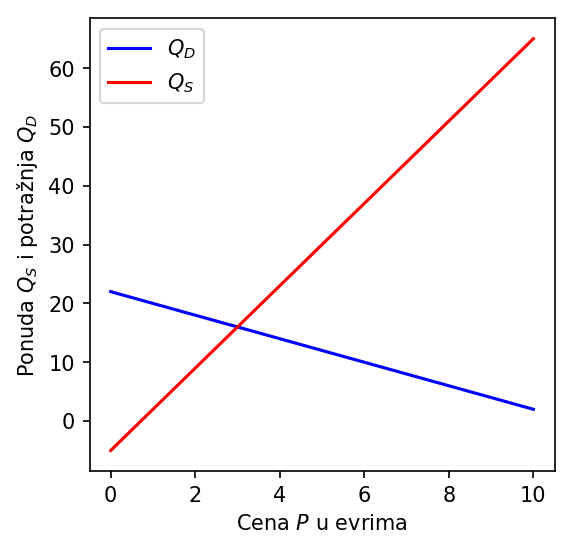

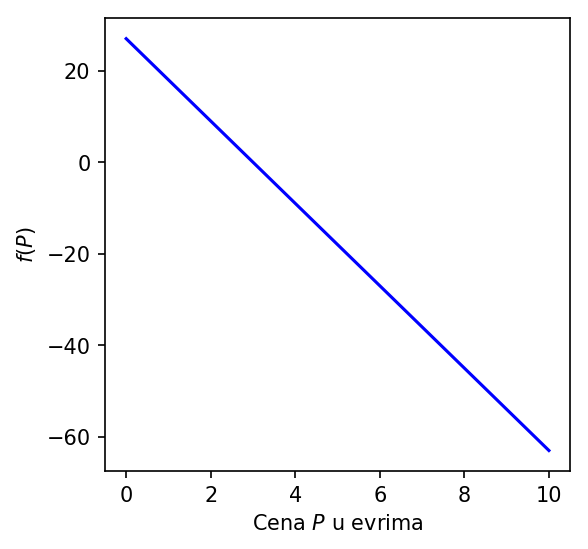

3.0000000000000004


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

Qd = lambda P,A,B: A - B*P
Qs = lambda P, C, D: -C + D * P
f = lambda P, A, B, C, D: Qd(P, A, B) - Qs(P, C, D)

A, B, C, D = 22, 2, 5, 7
P = np.linspace(0,10,2000)

plt.figure(figsize = (4,4), dpi = 150)
plt.plot(P, Qd(P, A, B), "b-", label = "$Q_{D}$")
plt.plot(P, Qs(P, C, D), "r-", label = "$Q_{S}$")
plt.legend()
plt.xlabel('Cena $P$ u evrima')
plt.ylabel('Ponuda $Q_{S}$ i potražnja $Q_{D}$')
plt.show()


plt.figure(figsize = (4,4), dpi = 150)
plt.plot(P, f(P, A, B, C, D), "b-")
plt.xlabel('Cena $P$ u evrima')
plt.ylabel('$f(P)$')
plt.show()

znak = np.sign(f(P,A,B,C,D))
razlike = np.diff(znak)
nule = np.where(razlike != 0)[0]
Peq = [optimize.newton(f, P[x], args=(A, B, C, D)) for x in nule]
for i in range(len(Peq)):
    print(Peq[i])

b) Formirati Python definiciju (<font color='blue'>dinamicki_model</font>) koja predstavlja odgovarajuću diferencijalnu jednačinu kojom je opisana dinamika cene. Dinamika cene opisana je trenutnom razlikom između funkcije ponude i potražnje kao:

<br>
\begin{equation}
    \frac{dP(t)}{dt} = \gamma(Q_d(P) - Q_s(P)) = -\gamma(B + D)P(t) + \gamma(A + C)
\end{equation}
<br>

gde je faktor korelacije $\gamma = 0.1$ u odgovarajućim jedinicama. 
Koeficijenti $A$, $B$, $C$, $D$ i $\gamma$ treba da budu pozivni parametri definicije koja predstavlja diferencijalnu jednačinu.

In [11]:
gama = 0.1
dinamicki_model = lambda P, t, A, B, C, D, g: -g * (B + D) * P + g * (A + C)

c) Formirati Python skriptu koja rešava diferencijalnu jednačinu i iscrtava njena rešenja. Na istom grafiku prikazati dinamiku cene za tri moguća slučaja: početna cena $P(0)$ jednaka je ravnotežnoj ceni ($P(0) = P_{eq}$), početna cena je veća od ravnotežne ($P(0) = 2P_{eq}$) i početna cena je manja od ravnotežne cene ($P(0) = 0.5P_{eq}$). Za definisane parametre i početne uslove, rešavati diferencijalnu jednačinu na vremenskom domenu od $0$ do $10$ dana u $1000$ ekvidistantnih tačaka. Na istom grafiku, različitim bojama (plavom, crvenom i zelenom), nacrtati profile $P(t)$ za sva tri slučaja početnih uslova. Označiti ose grafika i ubaciti legendu.

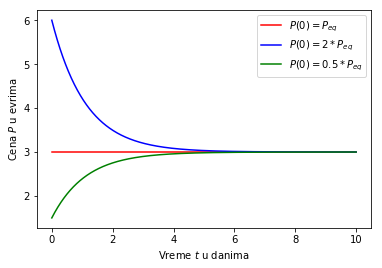

In [12]:
from scipy import integrate
t = np.linspace(0, 10, 1000)

znak = np.sign(dinamicki_model(P, 0, A, B, C, D, gama))
razlike = np.diff(znak)
nule = np.where(razlike!=0)[0]
Peq = optimize.newton(dinamicki_model, t[nule[0]], args=(0, A, B, C, D, gama))
Ps = [Peq,2*Peq,0.5*Peq]
colors = ['red','blue','green']
labels = ['P(0) = P_{eq}', 'P(0) = 2 * P_{eq}', 'P(0) = 0.5 * P_{eq}']
for i in range(len(Ps)):
    Pi = Ps[i]
    color = colors[i]
    label = labels[i]
    P = integrate.odeint(dinamicki_model, Pi, t, (A, B, C, D, gama))
    plt.plot(t, P, color=color, label=f'${label}$')
plt.legend()
plt.xlabel('Vreme $t$ u danima')
plt.ylabel('Cena $P$ u evrima')
plt.show()

d) Da li sistem ima stabilnu dinamiku? Šta se dešava sa cenom posle dovoljno dugog vremena? Da li se dostiže predviđeno stacionarno stanje? 

Sistem ima stabilnu dinamiku. Nakon odredjenog vremena cena dostize stacionarno stanje.

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 2__: Model sa očekivanjima cena

a) Na primeru porodične picerije sa slajdova primeniti kompleksniji model koji uključuje modelovanje očekivanja cene od strane potraživača. U takvom modelu funkcija potražnje $Q_d$ zavisi i od promene cene, kao i od brzine njene promene:

<br>
\begin{equation}
    Q_d = A - BP + M\frac{dP}{dt} + N\frac{d^2P}{dt^2},\\
    Q_s = -C + DP.
\end{equation}
<br>

Diferencijalna jednačina koja opisuje promenu cene proizvoda u ovakvom modelu i koju treba rešavati dobija se izjednačavanjem $Q_d = Q_s$ i ima formu:

<br>
\begin{equation}
    \frac{d^2P}{dt} + \frac{M}{N}\frac{dP}{dt} - \frac{B+D}{N}P = -\frac{A+C}{N}.
\end{equation}
<br>


Formirati Python definiciju (<font color='blue'>ocekivanja_cene</font>) koja predstavlja odgovarajuću diferencijalnu jednačinu kojom je opisana dinamika cene. Koeficijenti $A$, $B$, $C$, $D$, $M$ i $N$ treba da budu pozivni parametri definicije koja predstavlja diferencijalnu jednačinu.

In [13]:
def ocekivanja_cene(P,t,A,B,C,D,M,N):
    P1, P2 = P
    alfa = M/N
    w02 = -(B+D)/N
    return [P2, -(A+C)/N - alfa*P2 - w02*P1]

b) Ispitati i diskutovati dinamiku sistema za slučaj sledećih parametara:
<ol>
<li>$A = 42$ pice po danu, $B = 4$ pice po danu po evru, $C = 6$ pica po danu, $D = 8$ pica po danu po evru, $M = –4$ pice po evru, $N = 1$ (u odgovarajućim jedinicama), $P(0) = 6$ evra, $dP/dt(0) = 4$ evra po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li> 
<br>    
    
<li>$A = 40$ pica po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 3$ pice po danu po evru, $M = –2$ pice po evru, $N = –1$ (u odgovarajućim jedinicama), $P(0) = 12$ evra, $dP/dt(0) = 1$ evro po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li>
<br> 

<li>$A = 40$ pica po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 3$ pice po danu po evru, $M = 0.5$ pice po evru, $N = –1$ (u odgovarajućim jedinicama), $P(0) = 12$ evra, $dP/dt(0) = 1$ evro po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li>
</ol>
Za svaki od tri slučaja na jednom subplot-u nacrtati i vremenski ($P$ u funkciji od $t$) i fazni dijagram ($dP/dt$ u funkciji od $P$) dinamike cene.  

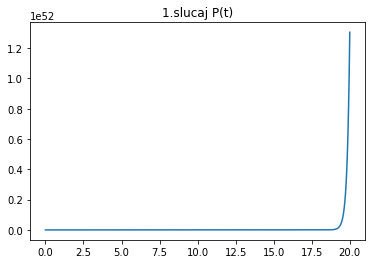

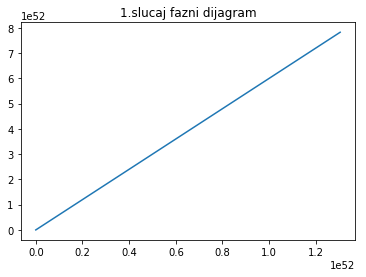

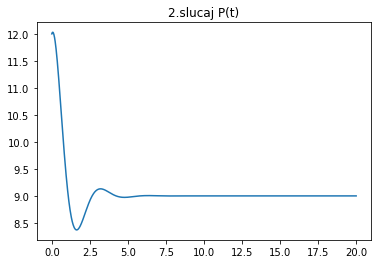

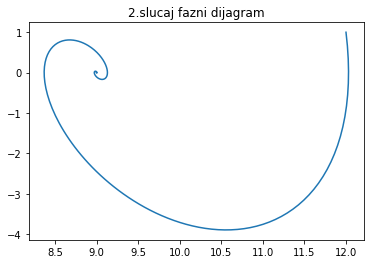

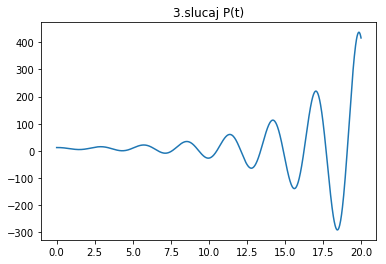

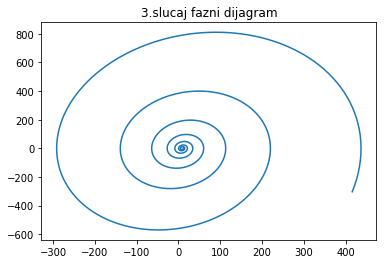

In [14]:
t = np.linspace(0,20,1000)
As = [42,40,40]
Bs = [4,2,2]
Cs = [6,5,5]
Ds = [8,3,3]
Ms = [-4,-2,0.5]
Ns = [1,-1,-1]
P0s = [6,12,12]
dpdts = [4,1,1]
for i in range(len(As)):
    A = As[i]; B = Bs[i]; C = Cs[i]; D = Ds[i];  M = Ms[i]; N = Ns[i]; P0i = P0s[i]; dpdti = dpdts[i];
    sol = integrate.odeint(ocekivanja_cene, (P0i,dpdti), t, (A,B,C,D,M,N))
    plt.plot(t, sol[:,0])
    plt.title(str(i+1) + ".slucaj P(t)")
    plt.show()
    plt.plot(sol[:,0],sol[:,1])
    plt.title(str(i+1) + ".slucaj fazni dijagram")
    plt.show()

c) Na osnovu analize stabilnosti sa slajdova, komentarisati očekivane rezultate dinamike sa dobijenim graficima. 
U kom slučaju je dinamika stabilna, u kom nestabilna i zašto? 
Komentarisati fazne dijagrame. Kojoj vrsti oscilacija odgovara ovakav model? 
Šta bi, prema analogiji sa fizikom, bio najbolji mogući slučaj za dinamiku cene? Predložiti neke vrednosti za parametre $B$, $D$, $M$ i $N$ tako da dinamike cene bude optimalna. Nacrtati grafik takve dinamike cene.

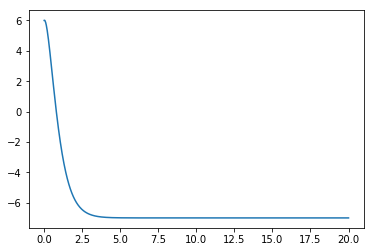

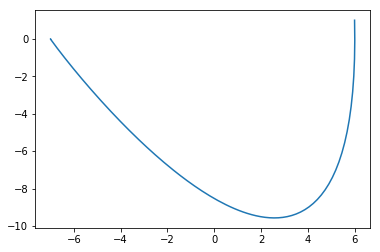

In [15]:
#(M/(2*N)) = sqrt(-(B+D)/N) - kriticno amortizovana
A, B, C, D, M, N, P0i, dpdti = 50, -4, 6, -4, 8, 2, 6, 1
sol = integrate.odeint(ocekivanja_cene, (P0i,dpdti), t, (A,B,C,D,M,N))
plt.plot(t,sol[:,0])
plt.show()
plt.plot(sol[:,0], sol[:,1])
plt.show()

- U prvom slucaju prikazana je jako prigusena oscilacija gde je lambda2 < 0 i u ovom slucaju dinamika nije stabilna.
- U drugom slucaju prikazana je slabo prigusena oscilacija tako da je alfa > 0 i u ovom slucaju vidimo da je dinamik stabilna.
- U trecem slucaju prikazana je slabo prigusena oscilacija gde je alfa < 0 i uvom slucaju dinamika nije stabilna.
- Najbolji moguci slucaj bi, u analogiji sa fizikom, bio predstavljen kriticno amortizovanim oscilacijama sa pozitivnim alfa. 